In [1]:
import pandas as pd
import numpy as np
import quandl
import re
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr

In [2]:
quandl.ApiConfig.api_key = 'svJ3hzKd6LTpRvcsjW_7'
end = dt.date.today()
start = dt.date(end.year - 4, end.month, end.day)

In [3]:
def pricelookup(tickers):
    querylis = []
    for x in tickers:
        x = re.sub('-', '_', x)
        term = 'EOD/' + x + '.11'
        querylis.append(term)
    df = quandl.get(querylis, start_date=start, end_date=end)
    df = df.rename(columns=lambda x: re.sub('EOD/', '', x))
    df = df.rename(columns=lambda x: re.sub(' - Adj_Close', '', x))
    df = df.rename(columns=lambda x: re.sub(' - Not Found', '', x))
    df = df.fillna(method='bfill')
    df = df.sort_index(axis=1)
    return df

In [4]:
spy = pricelookup(['SPY'])

In [5]:
pandas2ri.activate()

In [6]:
rframe = pandas2ri.py2ri(spy)

In [7]:
rframe

SPY
167.528767


In [8]:
print(rframe)

                         SPY
2013-12-20 00:00:00 167.5288
2013-12-23 00:00:00 168.4238
2013-12-24 00:00:00 168.7929
2013-12-26 00:00:00 169.6510
2013-12-27 00:00:00 169.6418
2013-12-30 00:00:00 169.6141
2013-12-31 00:00:00 170.4169
2014-01-02 00:00:00 168.7837
2014-01-03 00:00:00 168.7560
2014-01-06 00:00:00 168.2669
2014-01-07 00:00:00 169.3004
2014-01-08 00:00:00 169.3373
2014-01-09 00:00:00 169.4480
2014-01-10 00:00:00 169.9094
2014-01-13 00:00:00 167.6487
2014-01-14 00:00:00 169.4757
2014-01-15 00:00:00 170.3892
2014-01-16 00:00:00 170.1677
2014-01-17 00:00:00 169.4480
2014-01-21 00:00:00 169.9463
2014-01-22 00:00:00 170.0570
2014-01-23 00:00:00 168.6637
2014-01-24 00:00:00 165.0651
2014-01-27 00:00:00 164.2531
2014-01-28 00:00:00 165.2312
2014-01-29 00:00:00 163.6441
2014-01-30 00:00:00 165.3788
2014-01-31 00:00:00 164.4100
2014-02-03 00:00:00 160.7099
2014-02-04 00:00:00 161.8356
2014-02-05 00:00:00 161.6326
2014-02-06 00:00:00 163.7641
2014-02-07 00:00:00 165.7941
2014-02-10 00:

In [9]:
gmdh = importr('GMDH')

In [10]:
type(gmdh)

rpy2.robjects.packages.InstalledSTPackage

In [11]:
stats = importr('stats')

In [12]:
rframe = stats.ts(rframe)

In [13]:
result = gmdh.fcast(rframe)

    
 Point Forecast
    Lo 95
    Hi 95

1008
       267.4106
 264.5279
 270.2934

1009
       267.7804
 263.7439
 271.8169

1010
       268.3310
 263.4600
 273.2020

1011
       268.6342
 263.0845
 274.1839

1012
       268.9599
 262.8954
 275.0245




In [14]:
type(result)

rpy2.robjects.vectors.ListVector

In [15]:
spy.head()

,SPY
Date,
2013-12-20,167.528767
2013-12-23,168.423805
2013-12-24,168.792887
2013-12-26,169.651022
2013-12-27,169.641800


In [16]:
myresult = pandas2ri.ri2py(result)

In [17]:
myresult

R object with classes: ('list',) mapped to:
<ListVector - Python:0x1101b2e48 / R:0x7fd80d9b42e8>
[Str..., Flo..., Flo..., Flo..., Flo..., Mat..., Flo..., Flo...]
  method: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x1102c5788 / R:0x7fd80aa0b2f8>
['GMDH with input = 4 and layer = 3']
  mean: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('ts',) mapped to:
<FloatVector - Python:0x1102b0f88 / R:0x7fd80deab4f0>
[267.410622, 267.780373, 268.331036, 268.634187, 268.959915]
  lower: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('ts',) mapped to:
<FloatVector - Python:0x11010b0c8 / R:0x7fd80d9b3ed8>
[264.527868, 263.743863, 263.460028, 263.084471, 262.895380]
  upper: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('ts',) mapped to:
<FloatVector - Python:0x11010b5c8 / R:0x7fd80d9b4010>
[270.293375, 271.816882, 273.202045, 274.183903, 275.024451]
  level: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x11010b2c8 / R:0x7fd8041d5ab8>
[95.000000]
  x: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('ts',) mapped to:
<Matrix - Python:0x11010b308 / R:0x7fd80c959800>
[167.528767, 168.423805, 168.792887, 169.651022, ..., 264.320101, 266.510000, 268.200000, 267.170000]
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('ts',) mapped to:
<FloatVector - Python:0x1102b6bc8 / R:0x7fd80c69c200>
[-0.329056, -0.294696, 0.541131, -1.920892, ..., -1.420568, 1.483328, 1.575955, -0.965091]
  fitted: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('ts',) mapped to:
<FloatVector - Python:0x1102c7908 / R:0x7fd80c6a4000>
[169.970856, 169.908816, 169.875749, 170.704556, ..., 265.740669, 265.026672, 266.624045, 268.135091]

In [18]:
type(myresult)

rpy2.robjects.vectors.ListVector

In [19]:
panresult = pd.Series(myresult[1])

In [20]:
a = []

In [21]:
for i in panresult[0]:
    a.append(i)

In [22]:
a

[267.410621516985,
 267.7803725584317,
 268.33103627563474,
 268.6341871992603,
 268.95991543353887]

In [44]:
spy = spy.reset_index()

In [24]:
spy.tail()

,Date,SPY
1002,2017-12-13,265.404604
1003,2017-12-14,264.320101
1004,2017-12-15,266.510000
1005,2017-12-18,268.200000
1006,2017-12-19,267.170000


In [25]:
a = pd.Series(a)

In [26]:
spy['predicted'] = np.nan

In [27]:
place = len(spy)
for i in range(5):
    spy.loc[place, 'predicted'] = a[i]
    place +=1

In [29]:
spy[1006:]

,Date,SPY,predicted
1006,2017-12-19,267.17,NaN
1007,NaT,NaN,267.410622
1008,NaT,NaN,267.780373
1009,NaT,NaN,268.331036
1010,NaT,NaN,268.634187
1011,NaT,NaN,268.959915


In [30]:
panresult = pd.Series(myresult[7])

In [31]:
b = []

In [32]:
for i in panresult[0]:
    b.append(i)

In [33]:
len(b)

1003

In [34]:
b = pd.Series(b)

In [35]:
spy['fitted'] = np.nan

In [36]:
spy['fitted'][4:1007] = b

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
spy[1006:]

,SPY,predicted,fitted
Date,,,
2017-12-19,267.17,NaN,268.135091
2017-12-20,NaN,267.410622,NaN
2017-12-21,NaN,267.780373,NaN
2017-12-22,NaN,268.331036,NaN
2017-12-23,NaN,268.634187,NaN
NaT,NaN,268.959915,NaN


In [45]:
samp = spy.loc[1006, 'Date']

In [46]:
for i in range(1007, 1012):
    samp += dt.timedelta(days=1)
    spy.loc[i, 'Date'] = samp

In [47]:
spy = spy.set_index('Date')

In [48]:
spy.plot()

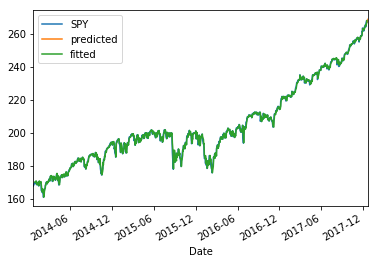

In [49]:
plt.show()

In [50]:
spy.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1106f2588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x110809d68>], dtype=object)

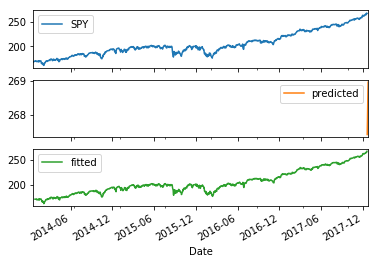

In [51]:
plt.show()

In [52]:
plt.savefig('SPY GMDH Dec20.png')

In [55]:
n_predictions = spy.copy()

In [56]:
n_predictions = n_predictions.reset_index()

In [57]:
n_predictions.tail()

,Date,SPY,predicted,fitted
1007,2017-12-20,NaN,267.410622,NaN
1008,2017-12-21,NaN,267.780373,NaN
1009,2017-12-22,NaN,268.331036,NaN
1010,2017-12-23,NaN,268.634187,NaN
1011,2017-12-24,NaN,268.959915,NaN


In [58]:
n_predictions = n_predictions[1007:]

In [59]:
n_predictions['predicted'].plot()

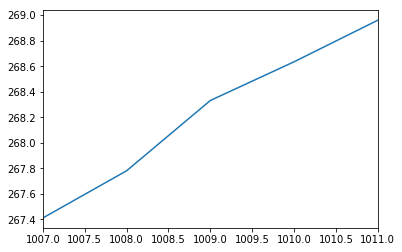

In [60]:
plt.show()

In [62]:
spy2 = spy.drop(['predicted'], axis=1)

In [63]:
spy2 = spy2.dropna()

In [67]:
spy2.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x114858390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x114a16588>], dtype=object)

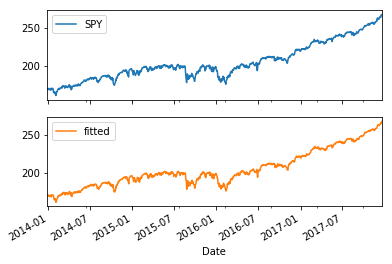

In [68]:
plt.show()

In [69]:
spy2

,SPY,fitted
Date,,
2013-12-27,169.641800,169.970856
2013-12-30,169.614119,169.908816
2013-12-31,170.416880,169.875749
2014-01-02,168.783664,170.704556
2014-01-03,168.755984,168.963065
2014-01-06,168.266945,169.010237
2014-01-07,169.300385,168.492271
2014-01-08,169.337301,169.613492
2014-01-09,169.448022,169.603046


In [70]:
spy2 = spy2.drop(['fitted'], axis=1)

In [71]:
spy2.to_csv('SPY_Dec20.csv')